# ANALYZING AMAZON SALES DATA
## PROBLEM STATEMENT:
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between
attributes. Do your own research and come up with your findings.

## FORMALIZATION OF THE PROBLEM
* ##### Data Extraction: 
    Extract and transform data from Amazon dataset.
* ##### Sales Trend Analysis: 
    Analyze sales trends Month-wise, Year-wise and Yearly-month-wise
* ##### Key Metrics Identification:
    Total sales revenue, Quantity of products sold, Average order value, Gross profit margin, Average profit per order
    
* ##### Factor Analysis: 
Determine the factors influencing sales performance, including but not limited to Seasonality, Marketing campaigns, Product categories, Pricing strategies
* ##### Relationship Analysis:
    1. Correlation between sales and marketing expenditure
    2. Impact of promotions on sales volume
    3. Seasonal variations in product demand
* ##### Findings Presentation: 
Summarize research findings in a clear and actionable manner. Visualize trends, metrics, and relationships using appropriate charts, graphs, and statistical methods.



## DATA COLLECTION AND PROCESSING
Link: https://drive.google.com/file/d/10sofXyF6NjwN6ngLyFfiPI-CUDpeqaN_/view

This data is in csv format. Downloaded it in project folder and renamed as data.csv

### IMPORTING NECESSERY LIBRARIES 
* Pandas - This library is used for data manipulation and analysis. It also provides features like efficiently storing and manipulating large datasets and not only that it also provide tools for merging, transforming and cleaning data.
* Numpy - This library is used for scientific computing with python. Generaly it provides support for large, multi-dimensional arrays and matrices.
* Matplotlib - This library help in creating types of visualizations including line plots, scatter plots, bar charts and histograms.
* Seaborn - This library is used for add enhanced aesthetics and additional plotting functions and its based on Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


#### QUICK LOOK

In [3]:
print(f"Size of the dataset: {df.shape}\n")
print(f"All columns: {df.columns}\n")
print(f"Short info of the dataset:")
df.info()

Size of the dataset: (100, 14)

All columns: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

Short info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float6

#### DATA CLEANING

In [4]:
# Change order date and ship date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#### ADJUST CLOUMNS

In [5]:
# Adding extra column to dataframe which contain only month, year and month with year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Date MonthYear'] = df['Order Date'].dt.strftime('%Y-%m')
df = df.drop(columns=['Order Date'])

#### TREAT NULL VALUES

In [6]:
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

##### There is not any null values. Dataset are okey

## EXPLORATORY DATA ANALYSIS
### CHECKING OUTLIERS IN THE DATAFRAME
##### Box Plot for Total Profit to visualize outliers

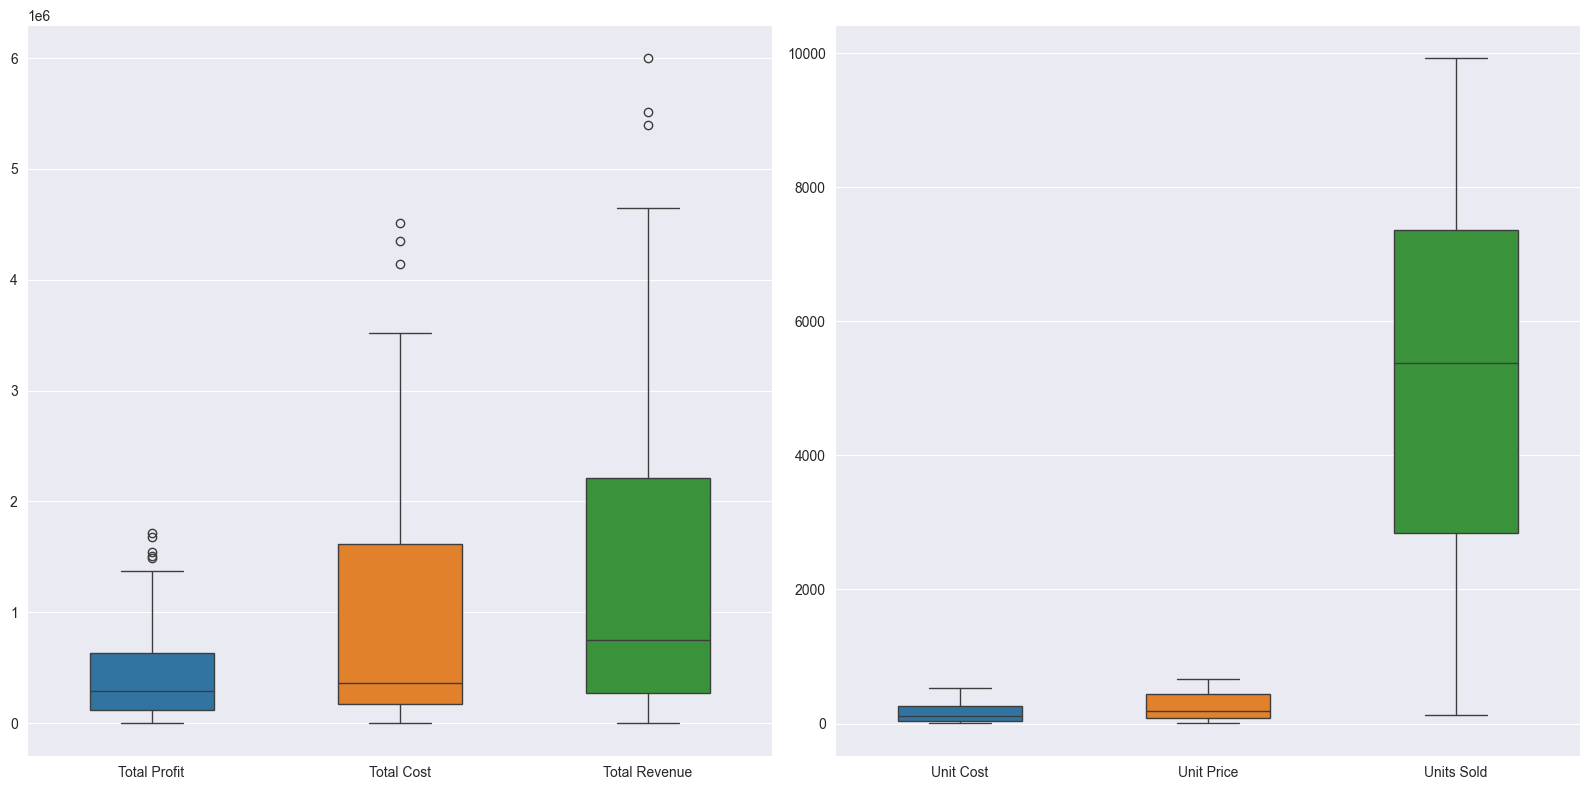

In [15]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Use the orient parameter to make the boxplot horizontal
sns.boxplot(data=df[['Total Profit', 'Total Cost', 'Total Revenue']], ax=axes[0], width=.5)
sns.boxplot(data=df[['Unit Cost', 'Unit Price', 'Units Sold']], ax=axes[1], width=.5)

plt.tight_layout()
plt.show()

There are some outliers in Total Profit, Total Cost and Total Revenue colums. No outliers in Unit Cost, Unit Price and Unit Sold Columns.
### DETECT OUTLIERS
##### Create a function named detect outliers. It aims to detect outliers in the specified column using the Z-score method.
The Z-score method assumes that the data follows a normal distribution and detects outliers as values that fall outside a certain number of standard deviations from the mean. In this case, the threshold is set to 2 standard deviations.

In [13]:
def detect_outliers(dataframe, column_name, threshold=2):
    column = dataframe[column_name]
    mean = np.mean(column)
    std = np.std(column)
    
    z_scores = (column - mean) / std
    outliers = dataframe[np.abs(z_scores) > threshold]
    
    return outliers

In [14]:
# Show outliers in Total Profit

profit_outliers = detect_outliers(df, "Total Profit")
profit_outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
30,Europe,Switzerland,Cosmetics,Offline,M,249693334,2012-10-20,8661,437.20,263.33,3786589.20,2280701.13,1505888.07,9,2012,2012-09
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,1,2015,2015-01
46,Europe,Iceland,Cosmetics,Online,C,331438481,2016-12-31,8867,437.20,263.33,3876652.40,2334947.11,1541705.29,12,2016,2016-12
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.20,263.33,4324782.40,2604860.36,1719922.04,7,2013,2013-07
79,Australia and Oceania,Samoa,Cosmetics,Online,H,670854651,2013-08-07,9654,437.20,263.33,4220728.80,2542187.82,1678540.98,7,2013,2013-07
93,Europe,Romania,Cosmetics,Online,H,660643374,2010-12-25,7910,437.20,263.33,3458252.00,2082940.30,1375311.70,11,2010,2010-11


In [15]:
# Show outliers in Total Revenue

revenue_outliers = detect_outliers(df, "Total Revenue")
revenue_outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,1,2015,2015-01
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.00,4,2012,2012-04
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,231145322,2013-08-16,9892,437.20,263.33,4324782.40,2604860.36,1719922.04,7,2013,2013-07
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11


In [16]:
# Show outliers in Total Cost

cost_outliers = detect_outliers(df, "Total Cost")
cost_outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order Date MonthYear
13,Central America and the Caribbean,Honduras,Household,Offline,H,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,2,2017,2017-02
33,Asia,Myanmar,Household,Offline,H,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,1,2015,2015-01
38,Asia,Brunei,Office Supplies,Online,L,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.00,4,2012,2012-04
68,Europe,Lithuania,Office Supplies,Offline,H,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,10,2010,2010-10
75,North America,Mexico,Household,Offline,C,986435210,2014-12-12,6954,668.27,502.54,4647149.58,3494663.16,1152486.42,11,2014,2014-11


In [17]:
print(f"Total Outliers in Total Profit column is: {len(profit_outliers)}")
print(f"Total Outliers in Total Revenue column is: {len(revenue_outliers)}")
print(f"Total Outliers in Total Cost column is: {len(cost_outliers)}")


Total Outliers in Total Profit column is: 7
Total Outliers in Total Revenue column is: 6
Total Outliers in Total Cost column is: 5


#### VISUALIZATION OF TRENDS

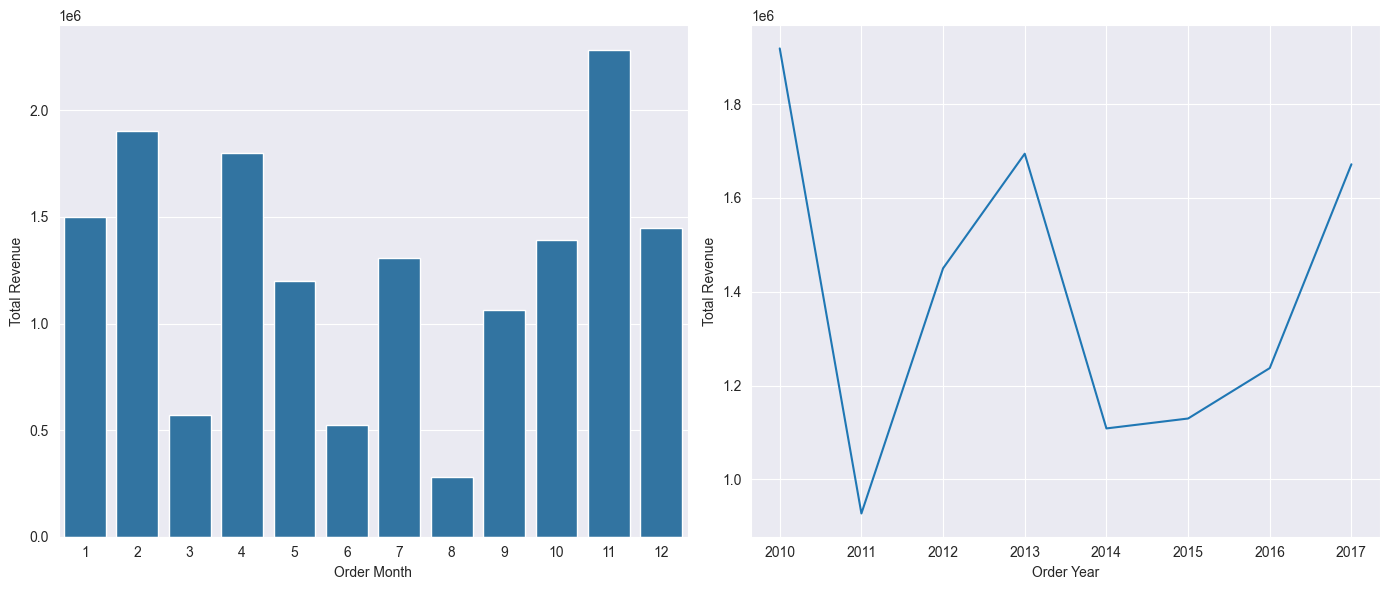

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for total revenue over the months
sns.barplot(x='Order Month', y='Total Revenue', data=df, 
            ax=axes[0], errorbar=None)

# Line plot for Total profit through years
mean_profit_by_year = df.groupby('Order Year')['Total Revenue'].mean().reset_index()
sns.lineplot(x='Order Year', y='Total Revenue', data=mean_profit_by_year, ax=axes[1])

plt.tight_layout()
plt.show()

#### OBSERVATIONS:

* ##### Monthly Trends:
    * Each month's revenue varies across different years, indicating potential seasonal trends or fluctuations in consumer behavior.
    * Some months consistently show higher revenue, such as February in 2010 and 2017, and July in 2013.
    * Exploring the reasons behind these fluctuations, such as promotions, market conditions, or product launches, could help optimize sales strategies and improve revenue performance.
    
* ##### Yearly Trend:
    * The total revenue shows variations from year to year. For instance, there was a significant increase in revenue from 2010 to 2012, followed by a decline in 2013.
    * The year 2012 recorded the highest total revenue among all years, while 2015 had the lowest.
    * Understanding the factors contributing to these fluctuations could provide insights into the business's performance and market dynamics.


### KEY MATRICS IDENTIFICATION

In [19]:
total_sales_revenue = df['Total Revenue'].sum()
total_quantity_sold = df['Units Sold'].sum()
average_order_value = df['Total Revenue'].mean()
total_customers = df['Order ID'].nunique()  # Assuming each unique order ID represents a customer
gross_profit_margin = ((df['Total Revenue'] - df['Total Cost']) / df['Total Revenue']).mean() * 100
average_profit_per_order = df['Total Profit'].mean()

# Display the calculated key metrics
print("Total Sales Revenue:", total_sales_revenue)
print("Quantity of Products Sold:", total_quantity_sold)
print("Average Order Value (AOV):", average_order_value)
print("Gross Profit Margin:", gross_profit_margin)
print("Average Profit per Order:", average_profit_per_order)

Total Sales Revenue: 137348768.31
Quantity of Products Sold: 512871
Average Order Value (AOV): 1373487.6831
Gross Profit Margin: 36.21162285657073
Average Profit per Order: 441681.98399999994


### FACTOR ANALYSIS
##### Sales by country and region

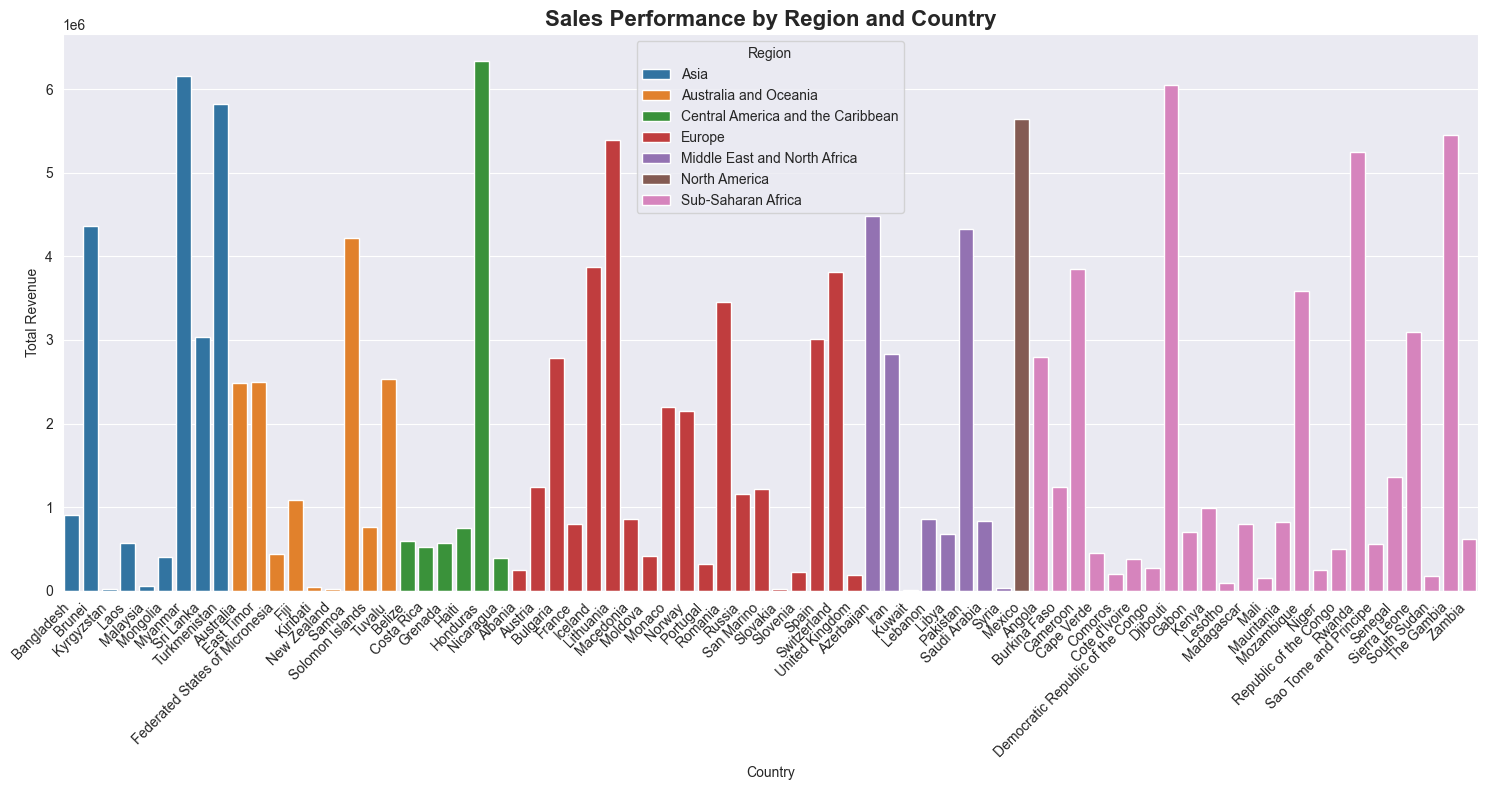

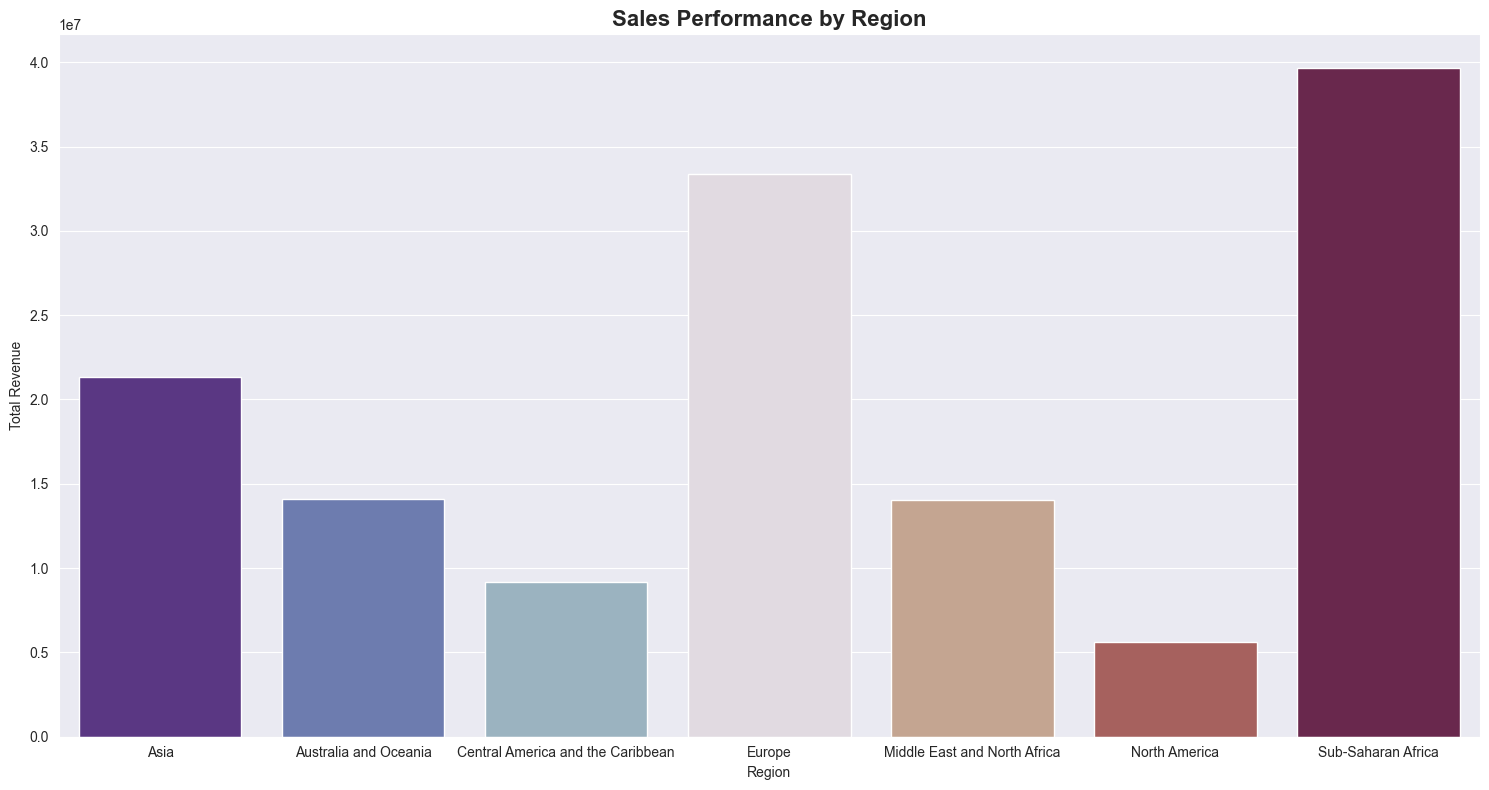

In [19]:
# Analyze sales performance by Region and Country
region_country_sales = df.groupby(
    ['Region', 'Country']).agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})
region_sales = df.groupby(
    ['Region']).agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})

# Create a bar plot for sales performance by country
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Total Revenue', 
            hue='Region', data=region_country_sales)
plt.title('Sales Performance by Region and Country', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for sales performance by region
plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='Total Revenue', hue='Region',
            data=region_sales, palette='twilight_shifted')
plt.title('Sales Performance by Region', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

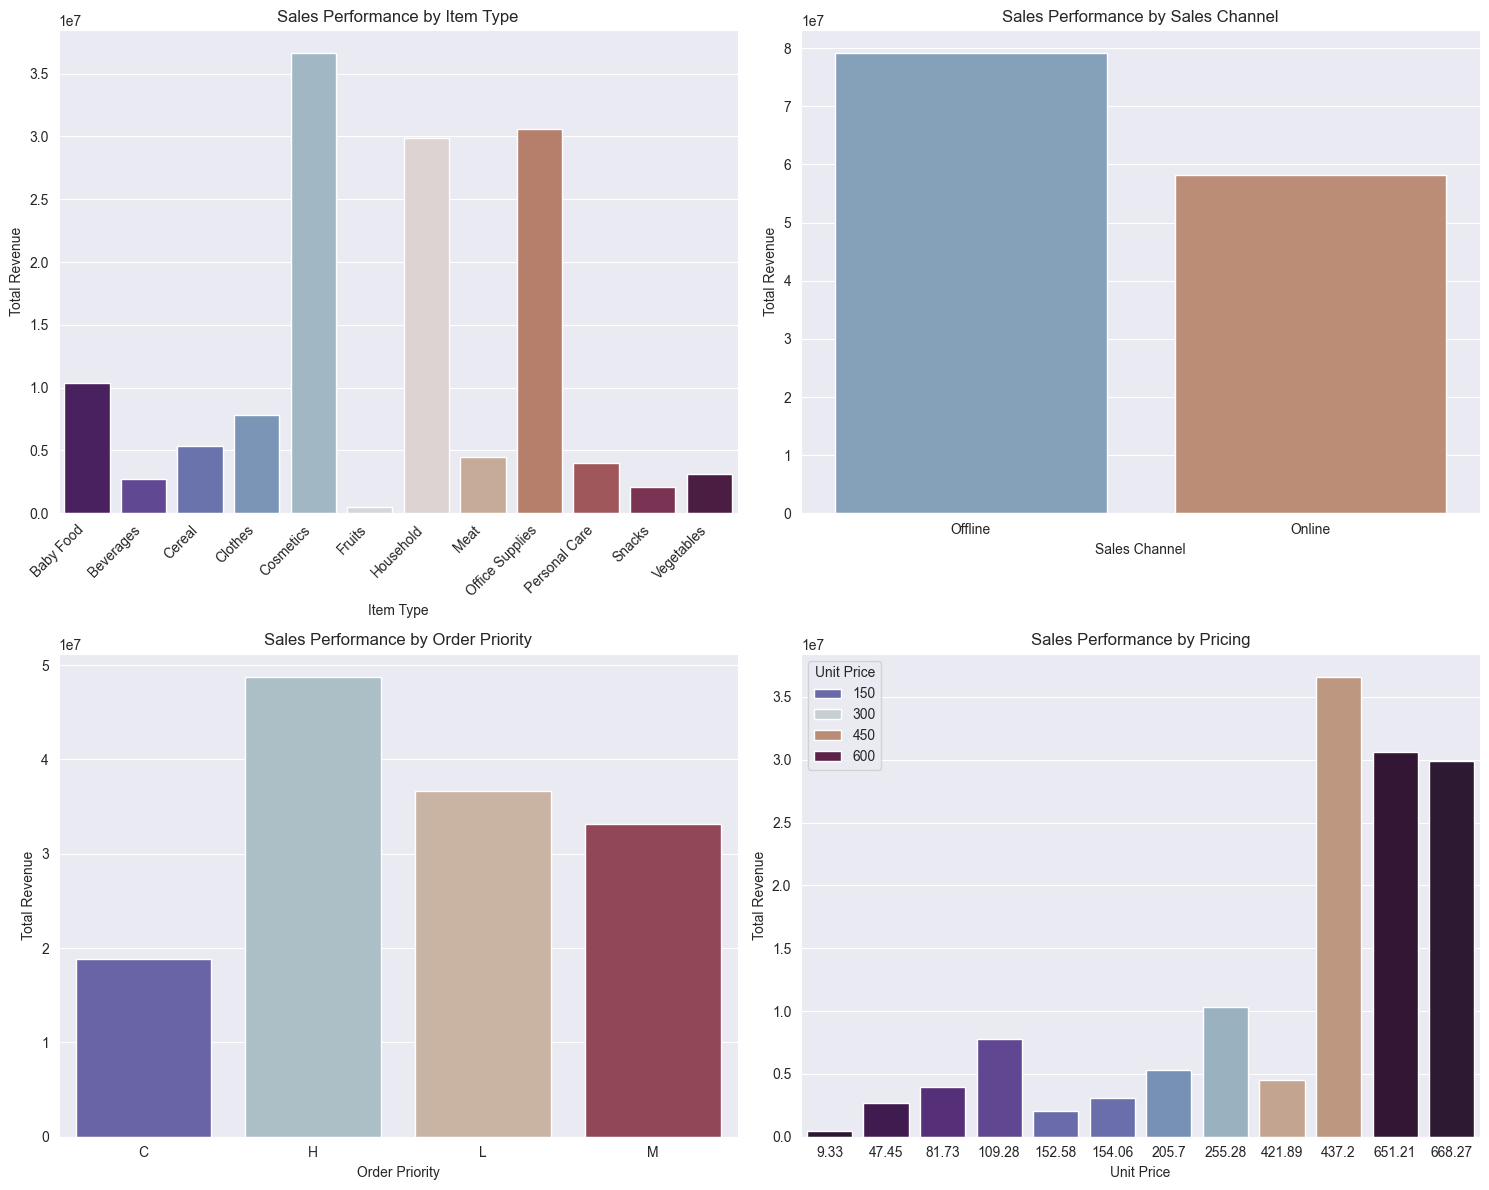

In [20]:
# Analyze sales performance by Item Type, Sales Channel, Order Priority, Pricing
item_type_sales = df.groupby('Item Type').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})
sales_channel_sales = df.groupby('Sales Channel').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})
order_priority_sales = df.groupby('Order Priority').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})
pricing_strategy_sales = df.groupby('Unit Price').agg({'Total Revenue': 'sum', 'Units Sold': 'sum'})

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

item_type_plot = sns.barplot(x=item_type_sales.index, y='Total Revenue', 
                             hue=item_type_sales.index, data=item_type_sales, 
                             ax=axes[0], palette='twilight_shifted')
item_type_plot.set_xticks(range(len(item_type_sales.index)))
item_type_plot.set_xticklabels(item_type_sales.index, rotation=45, ha='right')
axes[0].set_title('Sales Performance by Item Type')

sns.barplot(x=sales_channel_sales.index, y='Total Revenue', hue=sales_channel_sales.index,
            data=sales_channel_sales, ax=axes[1], palette='twilight_shifted')
axes[1].set_title('Sales Performance by Sales Channel')

sns.barplot(x=order_priority_sales.index, y='Total Revenue', data=order_priority_sales, 
            ax=axes[2], palette='twilight_shifted', hue=order_priority_sales.index)
axes[2].set_title('Sales Performance by Order Priority')

sns.barplot(x=pricing_strategy_sales.index, y='Total Revenue', data=pricing_strategy_sales, 
            ax=axes[3], palette='twilight_shifted', hue=pricing_strategy_sales.index)
axes[3].set_title('Sales Performance by Pricing')

plt.tight_layout()
plt.show()


#### OBSERVATIONS:

* ##### Sales Performance by Region and Country:
    * The total revenue and units sold vary significantly across different regions and countries.
    * In the Sub-Saharan Africa region has the highest sales and Djibouti has the highest total revenue.
    * Country wise Honduras has the highest sales

* ##### Sales Performance by Item Type:
    * The item types 'Cosmetics', 'Household', and 'Office Supplies' contribute significantly to total revenue.
    * 'Fruits' and 'Snacks' have relatively lower total revenue and units sold compared to other item types.

* ##### Sales Performance by Sales Channel:
    * Offline sales generate higher total revenue and units sold compared to online sales.
    * This suggests that offline channels may be more effective or popular among customers.

* ##### Sales Performance by Order Priority:
    * Orders with order priority 'H' (high) contribute the most to total revenue and units sold.
    * This indicates that high-priority orders may be associated with larger quantities or higher-priced items.

* ##### Sales Performance by Unit Price:
    * There is a variation in total revenue and units sold based on the unit cost of products.
    * Products with higher unit costs tend to generate higher total revenue and units sold, indicating their potential profitability.

### RELATIONSHIP ANALYSIS

In [21]:
# Calculate correlation matrix
numeric_columns = df.select_dtypes(include=['float64'])
correlation_matrix = numeric_columns.corr()

# Display correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Unit Price,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.557365,0.467214,0.897327,0.804091,1.000000


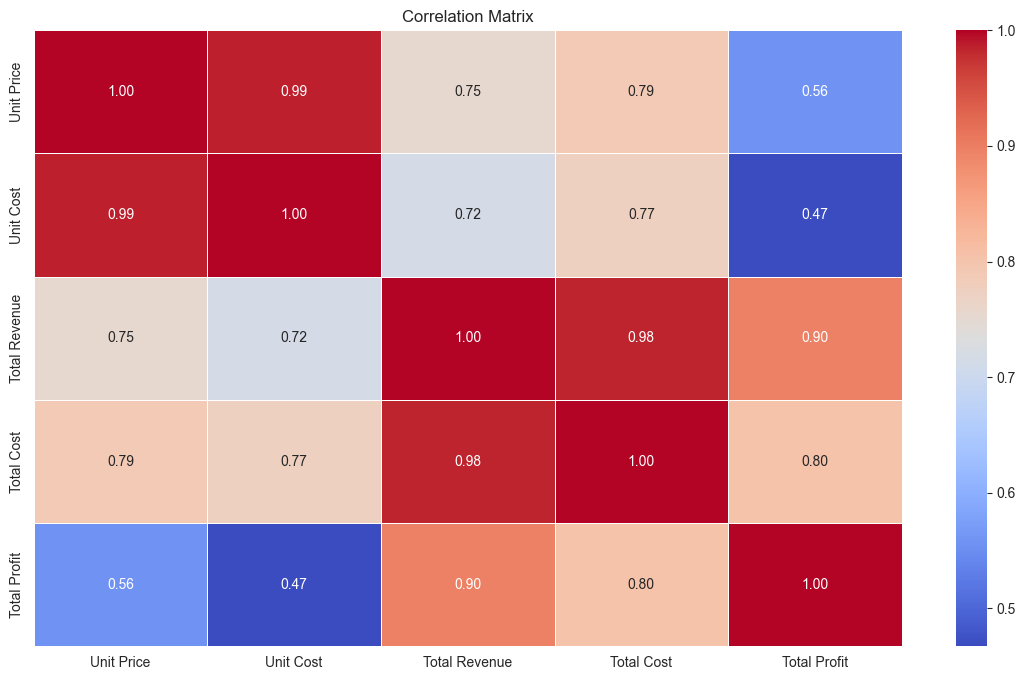

In [22]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

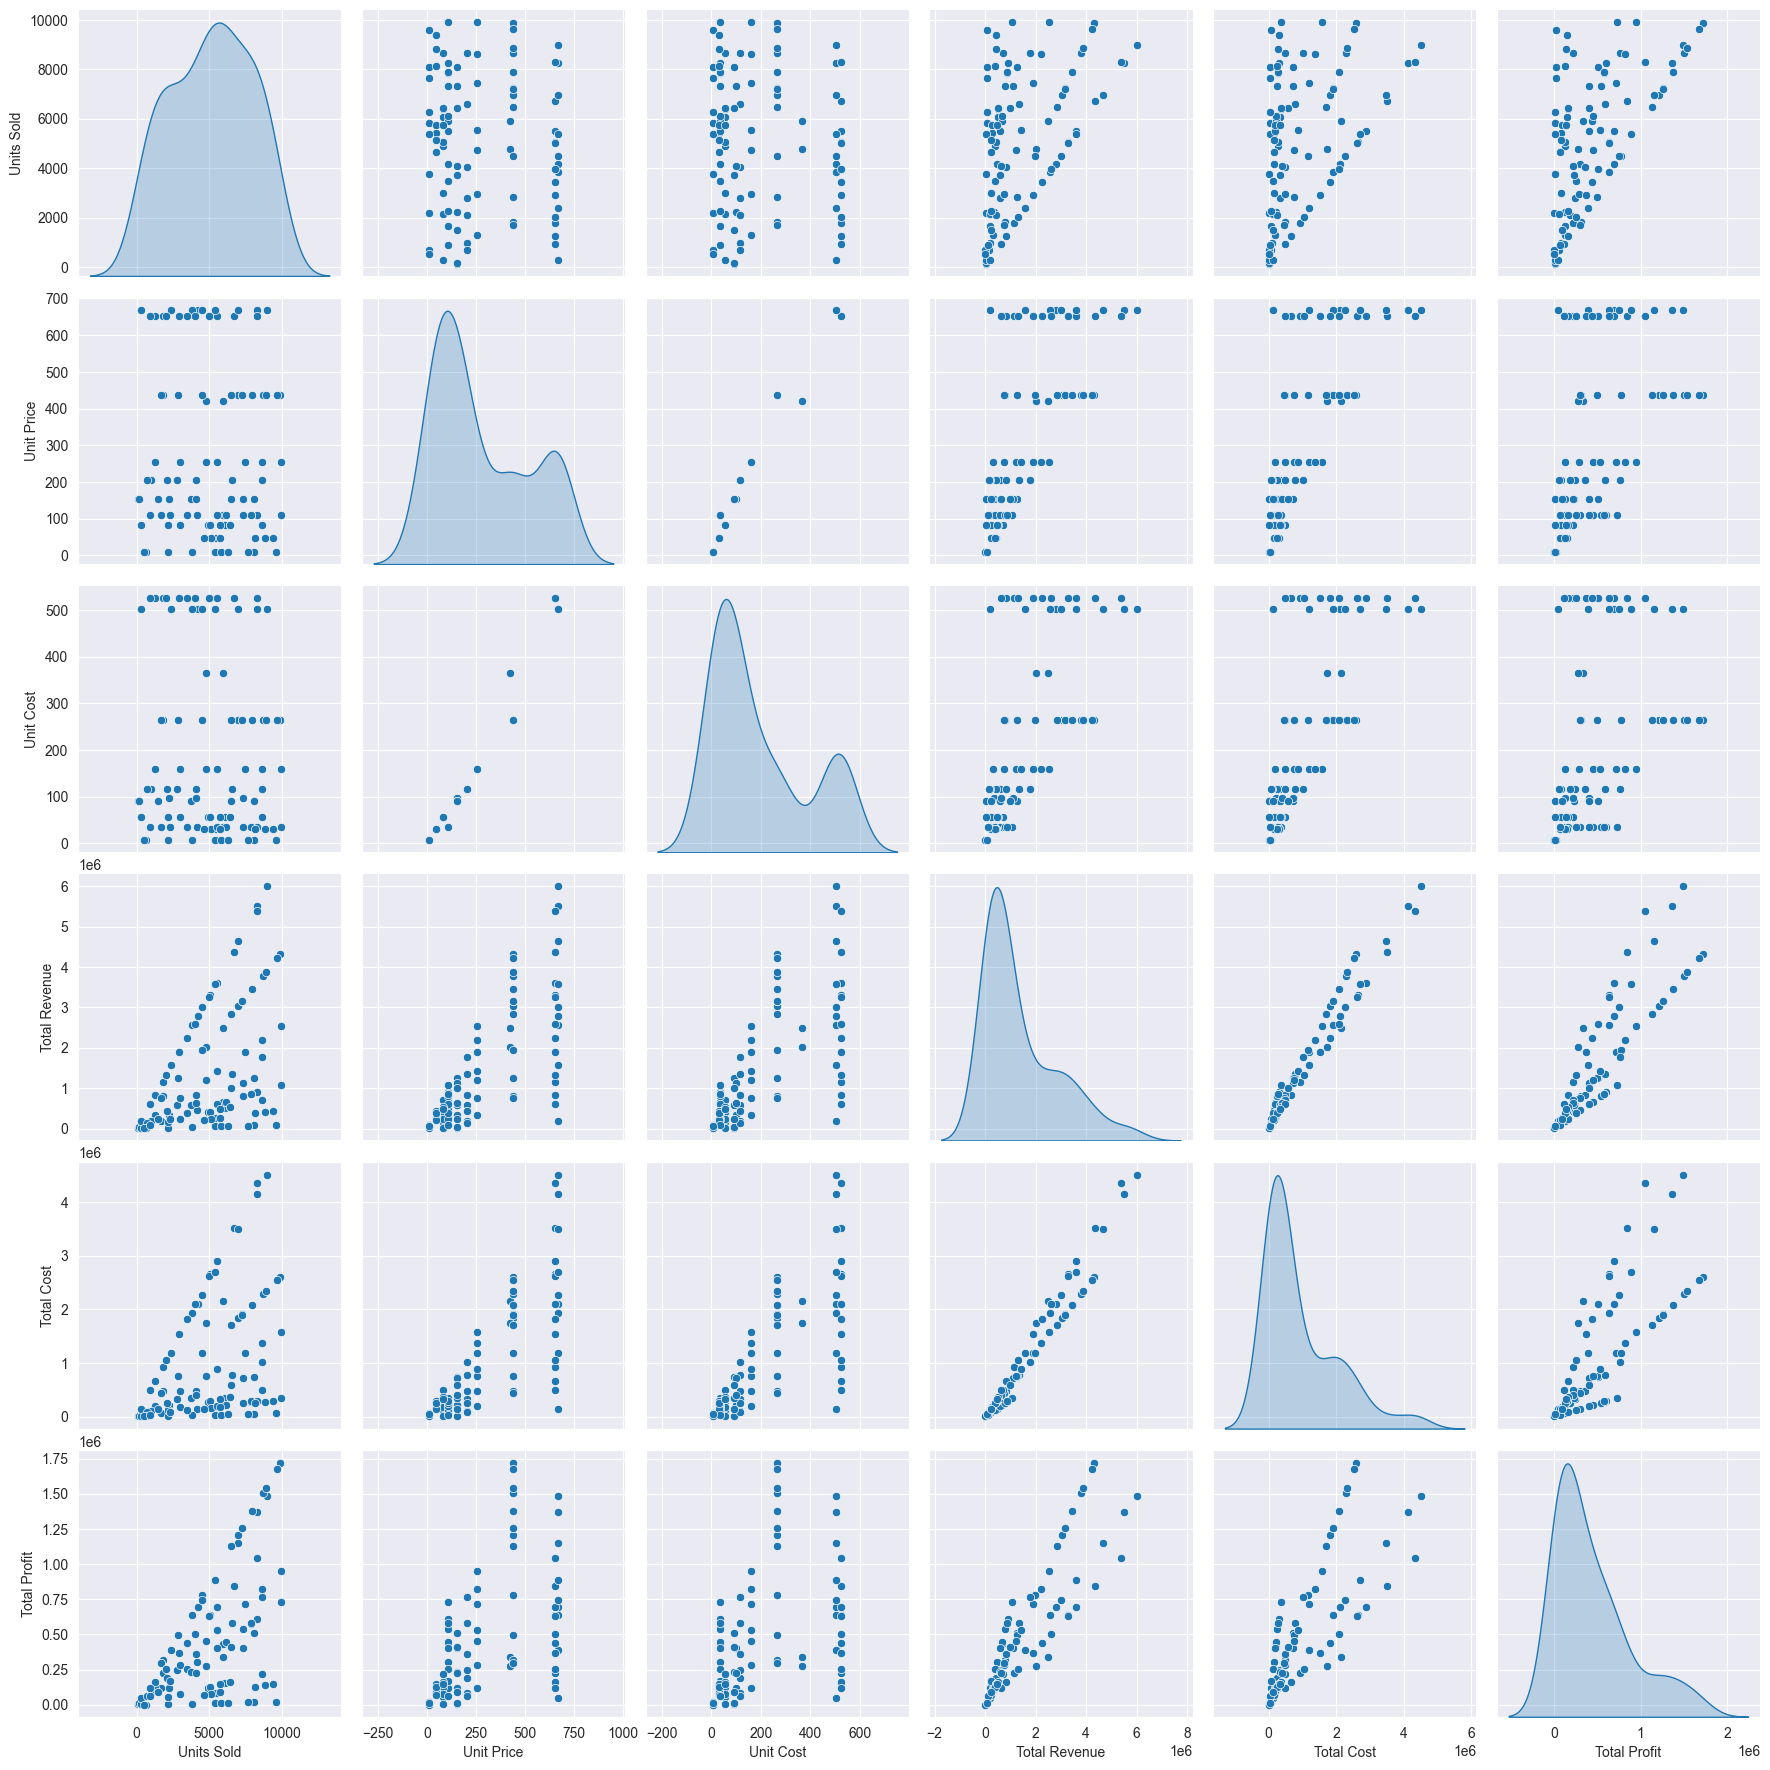

In [23]:
# Pairplot
columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

sns.pairplot(df[columns], diag_kind='kde', height=3)
plt.show()

## PREDECTIVE ANALYSIS

In [24]:
# Label Encoding of Item Type, Sales Channel and Order Priority for model training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [25]:
# Drop columns Region, Country, Order Date MonthYear, Order ID and Ship Date
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [26]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


#### Using Pycaret library
* PyCaret is an open-source, low-code machine learning library in Python that allows users to quickly and easily build, compare, and deploy machine learning models on structured and tabular data. It is designed to streamline the machine learning workflow and reduce the amount of code needed to build a model, while still providing users with a high degree of flexibility and control over the modeling process.
* PyCaret provides a variety of pre-processing methods, feature engineering techniques, and model selection strategies that can be easily applied to a dataset with just a few lines of code. It also includes a range of tools for model interpretation, such as feature importance plots and SHAP value plots.
* Some of the key features of PyCaret include:
    * Preprocessing and feature engineering functions
    * Automatic model selection and hyperparameter tuning
    * Interpretation tools for model results
    * Support for a wide range of machine learning algorithms
    * Deployment of models to production

In [27]:
df_auto_ml = df

In [28]:
from pycaret.regression import *

In [29]:
# Set target value
reg = setup(data=df_auto_ml,target='Total Profit')

,Description,Value
0,Session id,6603
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 11)"
4,Transformed data shape,"(100, 11)"
5,Transformed train set shape,"(70, 11)"
6,Transformed test set shape,"(30, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [30]:
# Comparing multiple models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0422,0.0046,0.0620,1.0000,0.0000,0.0000,0.3410
ridge,Ridge Regression,0.0421,0.0046,0.0619,1.0000,0.0000,0.0000,0.0050
lar,Least Angle Regression,0.0422,0.0047,0.0621,1.0000,0.0000,0.0000,0.0040
llar,Lasso Least Angle Regression,0.0361,0.0040,0.0548,1.0000,0.0000,0.0000,0.0050
br,Bayesian Ridge,0.0422,0.0046,0.0620,1.0000,0.0000,0.0000,0.0050
par,Passive Aggressive Regressor,376.2332,999250.5319,543.8187,1.0000,0.0017,0.0012,0.0040
huber,Huber Regressor,0.0768,0.0106,0.0979,1.0000,0.0000,0.0000,0.0060
en,Elastic Net,5992.1266,77199838.1161,7670.3551,0.9987,0.1225,0.0971,0.0050
lasso,Lasso Regression,6412.6827,87102513.7448,8183.3459,0.9986,0.1359,0.1049,0.0110
et,Extra Trees Regressor,63862.7135,9976139995.9988,87066.0938,0.9388,0.3524,0.3581,0.0160


LinearRegression(n_jobs=-1)

In [31]:
# Using Lasso Least Angle Regression algorithm to train model
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0520,0.0071,0.0841,1.0000,0.0000,0.0000
1,0.0192,0.0005,0.0217,1.0000,0.0000,0.0000
2,0.0299,0.0016,0.0400,1.0000,0.0000,0.0000
3,0.0754,0.0142,0.1191,1.0000,0.0000,0.0000
4,0.0394,0.0068,0.0827,1.0000,0.0000,0.0000
5,0.0241,0.0010,0.0316,1.0000,0.0000,0.0000
6,0.0248,0.0012,0.0339,1.0000,0.0000,0.0000
7,0.0255,0.0009,0.0293,1.0000,0.0000,0.0000
8,0.0238,0.0010,0.0324,1.0000,0.0000,0.0000


In [32]:
# Tuning the model for better performance
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0522,0.0071,0.0842,1.0000,0.0000,0.0000
1,0.0192,0.0005,0.0217,1.0000,0.0000,0.0000
2,0.0298,0.0016,0.0399,1.0000,0.0000,0.0000
3,0.0754,0.0142,0.1190,1.0000,0.0000,0.0000
4,0.0392,0.0068,0.0827,1.0000,0.0000,0.0000
5,0.0243,0.0010,0.0318,1.0000,0.0000,0.0000
6,0.0249,0.0012,0.0340,1.0000,0.0000,0.0000
7,0.0255,0.0009,0.0293,1.0000,0.0000,0.0000
8,0.0237,0.0010,0.0323,1.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


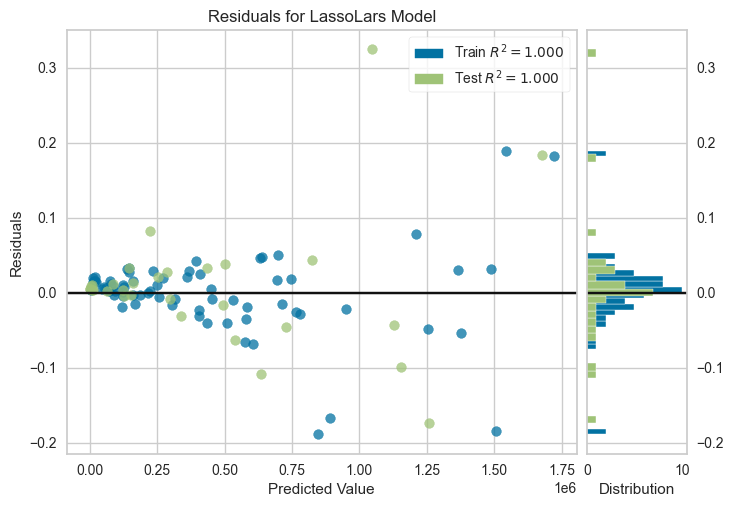

In [33]:
# Plot residuals for Lasso Least Angle Regression based trained model
plot_model(tuned_llar_model)

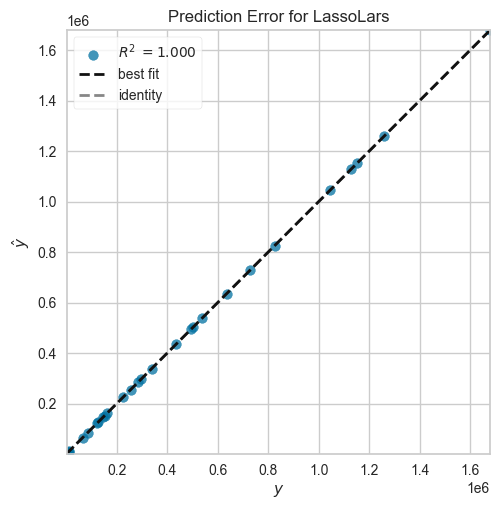

In [34]:
# Plot prediction error plot for Lasso Least Angle Regression based trained model
plot_model(tuned_llar_model, plot="error")

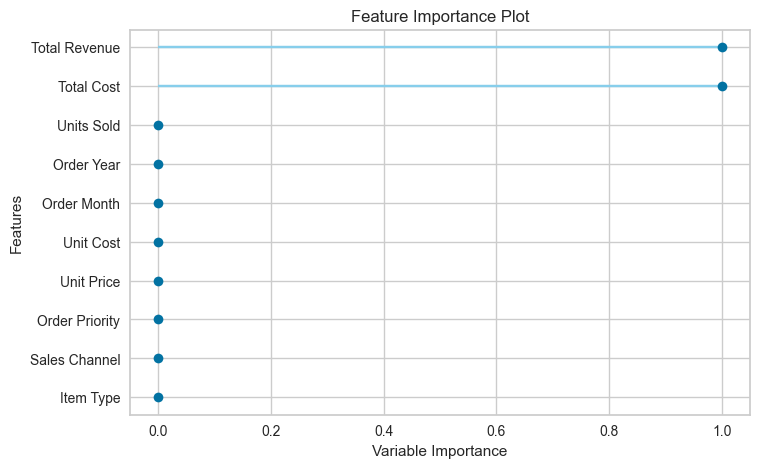

In [35]:
# Plot feature importance plot
plot_model(tuned_llar_model,plot='feature')

In [36]:
# Predicting total profit using Lasso Least Angle Regression based trained model
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0483,0.0071,0.0845,1.0000,0.0000,0.0000


,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
23,5,1,1,2187,9.330000,6.920000,2.040471e+04,1.513404e+04,9,2014,5.270670e+03,5.270679e+03
17,1,0,0,5430,47.450001,31.790001,2.576535e+05,1.726197e+05,4,2015,8.503380e+04,8.503381e+04
71,5,1,2,673,9.330000,6.920000,6.279090e+03,4.657160e+03,8,2015,1.621930e+03,1.621935e+03
5,0,1,0,2974,255.279999,159.419998,7.592028e+05,4.741151e+05,2,2015,2.850876e+05,2.850877e+05
22,10,1,2,2225,152.580002,97.440002,3.394905e+05,2.168040e+05,6,2016,1.226865e+05,1.226865e+05
56,3,0,0,9905,109.279999,35.840000,1.082418e+06,3.549952e+05,6,2010,7.274232e+05,7.274231e+05
82,4,1,1,6489,437.200012,263.329987,2.836991e+06,1.708748e+06,11,2016,1.128242e+06,1.128242e+06
91,1,0,1,9389,47.450001,31.790001,4.455081e+05,2.984763e+05,7,2014,1.470317e+05,1.470318e+05
95,3,1,3,888,109.279999,35.840000,9.704064e+04,3.182592e+04,7,2011,6.521472e+04,6.521472e+04
53,8,0,3,3457,651.210022,524.960022,2.251233e+06,1.814787e+06,11,2011,4.364462e+05,4.364463e+05


### Implement Linear Regression

In [37]:
# Select the independent variables and target variable
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Performing fit transform on X_train dataframe
X_train = scaler.fit_transform(X_train)

# Performing transform on X_test dataframe
X_test = scaler.transform(X_test)

In [39]:
# Applying Linear Regression on X_train and y_train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
# Calculating mean squared error
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
np.mean(mse)

-1.0360645747295233e-18

In [41]:
## prediction
reg_pred = regression.predict(X_test)
reg_pred

array([2.25246900e+05, 4.36446250e+05, 6.32512500e+05, 8.52235800e+04,
       4.35499200e+05, 5.03358750e+05, 1.22686500e+05, 7.47939490e+05,
       7.82812000e+03, 9.51410500e+05, 6.34745900e+05, 1.50588807e+06,
       7.66835040e+05, 1.36727250e+06, 1.19685000e+05, 6.39077500e+05,
       1.46875140e+05, 2.35601160e+05, 6.06834720e+05, 5.32525000e+04,
       2.55718080e+05, 1.25802000e+03, 1.30091800e+04, 1.87545030e+05,
       5.39196480e+05, 1.22865120e+05, 7.55559000e+04, 1.51034700e+04,
       5.84073870e+05, 8.99040600e+04])

<Figure size 1000x1400 with 0 Axes>

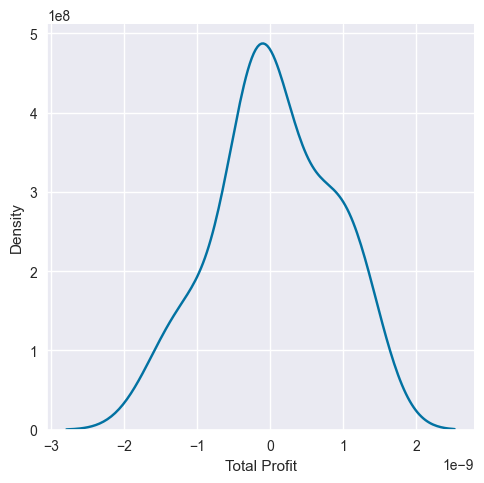

In [52]:
# Creating kernel density estimate plot
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10, 14))
sns.displot(reg_pred - y_test,kind='kde')

plt.show()

In [48]:
# Finding Accuracy percentage on the bases of r2 score
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)

# Calculate the percentage of accuracy
accuracy_pct = score * 100

print("Accuracy: {:.2f}%".format(accuracy_pct))

Accuracy: 100.00%


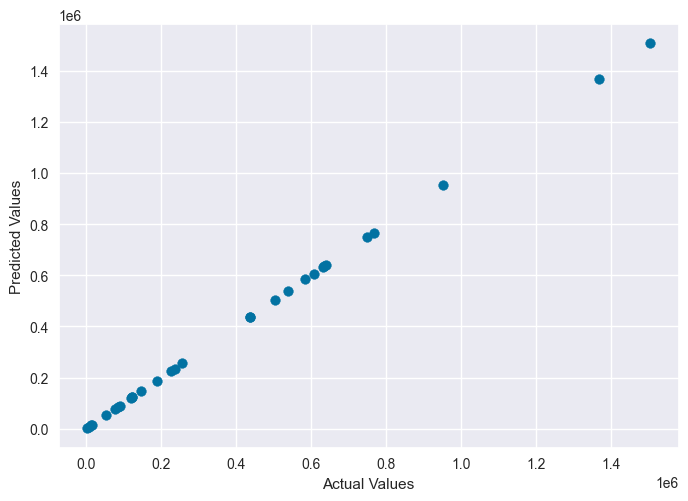

In [49]:
# Plot the predicted values against the actual values to visualize how well the model is fitting the data.
import matplotlib.pyplot as plt

plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
# Calculate the mean squared error (MSE) or root mean squared error (RMSE) to quantify the model's performance.

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 5.926478118360115e-19
RMSE: 7.698362240347044e-10


In [54]:
import plotly.graph_objs as go
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

# Create a copy of the X_train numpy array with modified column names
X_train_df = pd.DataFrame(X_train, columns=['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year'])

# Extract the coefficients of the linear regression model
coef = reg.coef_

# Create a DataFrame with the coefficients and feature names
feature_importances = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': coef})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Create a bar chart of the feature importances using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_importances['Feature'], y=feature_importances['Importance']))
fig.update_layout(title='Feature Importance (R-squared = {:.2f})'.format(r2),
                  xaxis_title='Feature',
                  yaxis_title='Importance',
                  xaxis_tickangle=-45)
fig.show()

## KEY FINDING AND RECOMMENDATION

### Sales Performance by Region and Country:

* The analysis revealed significant variations in total revenue and units sold across different regions and countries.
* #### Recommendation: 
Allocate resources and tailor marketing strategies based on geographical trends and preferences. Focus on high-performing regions and countries to maximize sales potential.

### Sales Performance by Item Type:

* Certain product categories, such as cosmetics and office supplies, generated higher total revenue and units sold compared to others.
* #### Recommendation: 
Invest in popular product categories to capitalize on existing demand. Consider expanding product offerings within high-performing categories to further boost sales.

### Sales Performance by Sales Channel:

* Offline channels contributed more to total revenue and units sold compared to online channels.
* #### Recommendation: 
Evaluate the effectiveness of both online and offline channels. Consider optimizing online channels to increase their contribution to overall sales.

### Sales Performance by Order Priority:

* Orders with higher priority levels (e.g., H, L) generated more total revenue and units sold.
* #### Recommendation: 
Streamline order processing and fulfillment procedures to prioritize high-priority orders. Ensure efficient handling of all order types to maintain customer satisfaction.

### Time Trends:

* Monthly and yearly sales trends indicated seasonal fluctuations and long-term growth patterns.
* #### Recommendation: 
Anticipate seasonal demand variations and adjust inventory levels and marketing efforts accordingly. Implement strategies to sustain long-term growth and capitalize on emerging market trends.

### Relationship Analysis:

* Correlation analysis identified strong positive correlations between variables such as total revenue, units sold, and total profit.
* #### Recommendation: 
Continuously monitor and analyze key metrics to identify potential areas for improvement. Implement data-driven strategies to enhance sales performance and profitability.